In [209]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import gc

---

# Exploring Data

---

In [210]:
data_folder = r'/mnt/c/Users/Jezza/Desktop/Datasets/MICCAI_BraTS2020_TrainingData'

In [211]:
# List all folders within the data_folder directory
folders = [f.path for f in os.scandir(data_folder) if f.is_dir()]
print(folders)

['/mnt/c/Users/Jezza/Desktop/Datasets/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001', '/mnt/c/Users/Jezza/Desktop/Datasets/MICCAI_BraTS2020_TrainingData/BraTS20_Training_002', '/mnt/c/Users/Jezza/Desktop/Datasets/MICCAI_BraTS2020_TrainingData/BraTS20_Training_003', '/mnt/c/Users/Jezza/Desktop/Datasets/MICCAI_BraTS2020_TrainingData/BraTS20_Training_004', '/mnt/c/Users/Jezza/Desktop/Datasets/MICCAI_BraTS2020_TrainingData/BraTS20_Training_005', '/mnt/c/Users/Jezza/Desktop/Datasets/MICCAI_BraTS2020_TrainingData/BraTS20_Training_006', '/mnt/c/Users/Jezza/Desktop/Datasets/MICCAI_BraTS2020_TrainingData/BraTS20_Training_007', '/mnt/c/Users/Jezza/Desktop/Datasets/MICCAI_BraTS2020_TrainingData/BraTS20_Training_008', '/mnt/c/Users/Jezza/Desktop/Datasets/MICCAI_BraTS2020_TrainingData/BraTS20_Training_009', '/mnt/c/Users/Jezza/Desktop/Datasets/MICCAI_BraTS2020_TrainingData/BraTS20_Training_010', '/mnt/c/Users/Jezza/Desktop/Datasets/MICCAI_BraTS2020_TrainingData/BraTS20_Training_011', '/mnt/c/U

In [212]:
# Display each file in each folder
for folder in folders:
    files = os.listdir(folder)
    for file in files:
        print(file)

BraTS20_Training_001_flair.nii.gz
BraTS20_Training_001_seg.nii.gz
BraTS20_Training_001_t1.nii.gz
BraTS20_Training_001_t1ce.nii.gz
BraTS20_Training_001_t2.nii.gz
BraTS20_Training_002_flair.nii.gz
BraTS20_Training_002_seg.nii.gz
BraTS20_Training_002_t1.nii.gz
BraTS20_Training_002_t1ce.nii.gz
BraTS20_Training_002_t2.nii.gz
BraTS20_Training_003_flair.nii.gz
BraTS20_Training_003_seg.nii.gz
BraTS20_Training_003_t1.nii.gz
BraTS20_Training_003_t1ce.nii.gz
BraTS20_Training_003_t2.nii.gz
BraTS20_Training_004_flair.nii.gz
BraTS20_Training_004_seg.nii.gz
BraTS20_Training_004_t1.nii.gz
BraTS20_Training_004_t1ce.nii.gz
BraTS20_Training_004_t2.nii.gz
BraTS20_Training_005_flair.nii.gz
BraTS20_Training_005_seg.nii.gz
BraTS20_Training_005_t1.nii.gz
BraTS20_Training_005_t1ce.nii.gz
BraTS20_Training_005_t2.nii.gz
BraTS20_Training_006_flair.nii.gz
BraTS20_Training_006_seg.nii.gz
BraTS20_Training_006_t1.nii.gz
BraTS20_Training_006_t1ce.nii.gz
BraTS20_Training_006_t2.nii.gz
BraTS20_Training_007_flair.nii.gz


In [213]:
def display_slices(folder_number):
    folder_number = str(folder_number).zfill(3)

    # Construct the folder path using the folder number
    folder = fr'/mnt/c/Users/Jezza/Desktop/Datasets/MICCAI_BraTS2020_TrainingData/BraTS20_Training_{folder_number}'
    
    # Check if the folder exists
    if not os.path.exists(folder):
        raise ValueError(f"Folder BraTS20_Training_{folder_number} does not exist.")
    
    # Load all images in the folder
    file_list = sorted([f for f in os.listdir(folder) if f.endswith('.nii.gz')])
    
    # Check if there are files to load
    if len(file_list) == 0:
        raise ValueError(f"No .nii.gz files found in folder BraTS20_Training_{folder_number}.")

    # Load all images into a list
    image_data_list = []
    for file in file_list:
        nii_file_path = os.path.join(folder, file)
        img = nib.load(nii_file_path)
        data = img.get_fdata()
        image_data_list.append(data)

    # Function to extract just the modality part of the filename
    def extract_modality(file_name):
        # Remove folder prefix and extension
        base_name = os.path.basename(file_name)  # Get file name (without path)
        modality = base_name.split('_')[-1].replace('.nii.gz', '')  # Get the modality (e.g., 't2')
        return modality

    # Function to update and display all images for a given slice index
    def update_slice(slice_index):
        clear_output(wait=True)
        
        # Set up the subplot grid
        num_images = len(image_data_list)
        fig, axs = plt.subplots(1, num_images, figsize=(15, 5))  # Adjust size as needed
        
        # Add a master title
        plt.suptitle(f'Slice {slice_index} from BraTS20_Training_{folder_number}', fontsize=16)

        # Loop through each image and plot the corresponding slice
        for i, (data, file_name) in enumerate(zip(image_data_list, file_list)):
            modality = extract_modality(file_name)
            axs[i].imshow(data[:, :, slice_index], cmap='gray')
            axs[i].set_title(f'{modality}')
            axs[i].axis('off')
        
        plt.show()

    # Create the slider for slice index
    middle_slice = image_data_list[0].shape[2] // 2
    max_slices = image_data_list[0].shape[2] - 1  # Assuming all images have the same shape

    slice_slider = widgets.IntSlider(min=0, max=max_slices, step=1, value=middle_slice, description="Slice")

    # Use widgets.interact to update the displayed slice across all images
    widgets.interact(update_slice, slice_index=slice_slider)

In [214]:
display_slices(1)

interactive(children=(IntSlider(value=77, description='Slice', max=154), Output()), _dom_classes=('widget-inte…

In [215]:
try:
    del image_data_list
    del file_list
except NameError:
    pass

try:
    del folder_number
except NameError:
    pass

gc.collect()

50329

---

# Creating Dataloader

---

In [216]:
import torch
import torchvision.transforms as T
import nibabel as nib
import numpy as np
import torch.nn.functional as F

import numpy as np
import skimage.transform as skTrans
import torchvision.transforms as T
import torch

class Resize3D:
    def __init__(self, target_size):
        self.target_size = target_size

    def __call__(self, img):
        # Resize the image using skimage
        result = skTrans.resize(img, self.target_size, order=1, preserve_range=True)
        return torch.tensor(result).float()  # Convert the result to a tensor


In [260]:
from torchvision.transforms import v2
import torchvision.transforms as T
from torchvision.transforms import ToPILImage

data_transformer = v2.Compose([
    ToPILImage(),  # Convert numpy array to PIL image
    T.Resize((128, 128)),  # Resize to (128, 128)
    T.ToTensor()  # Convert the PIL image to tensor
])

In [286]:
class NiiDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.image_files = [f for f in os.listdir(image_dir) if f.endswith('.nii.gz')]
        self.mask_files = [f for f in os.listdir(mask_dir) if f.endswith('.nii.gz')]
        
        # Create a list of all slices
        self.slice_indices = []
        for img_file in self.image_files:
            img_path = os.path.join(self.image_dir, img_file)
            image_nii = nib.load(img_path)
            image_shape = image_nii.shape
            
            # Each image file will contribute slices equal to its depth (number of slices in z-axis)
            self.slice_indices.extend([(img_file, z) for z in range(image_shape[2])])

    def __len__(self):
        return len(self.slice_indices)

    def __getitem__(self, idx):
        img_file, z_slice = self.slice_indices[idx]

        # Load the image and mask
        img_path = os.path.join(self.image_dir, img_file)
        mask_path = os.path.join(self.mask_dir, img_file)  # Assuming mask file has the same name

        image_nii = nib.load(img_path)
        mask_nii = nib.load(mask_path)

        image = image_nii.get_fdata()
        mask = mask_nii.get_fdata()

        # Extract the specific 2D slice from the 3D volume
        image_slice = image[:, :, z_slice]
        mask_slice = mask[:, :, z_slice]

        # Convert to PyTorch tensors
        image_slice = torch.tensor(image_slice, dtype=torch.float32)
        mask_slice = torch.tensor(mask_slice, dtype=torch.long)

        # Apply transformations if any
        if self.transform:
            image_slice = self.transform(image_slice)
            mask_slice = self.transform(mask_slice)

        return image_slice, mask_slice  # Add a channel dimension for the image

In [338]:
from torch.utils.data.dataset import Dataset
from PIL import Image

class MICCAI_Dataset(Dataset):
  def __init__(self, folder, transform = None):
    self.paths = self.extract_image_paths(folder)
    self.transform = transform
    print(len(self.paths))

    self.slice_indices = []
    for path in self.paths:
        flair_path = path + '_flair.nii.gz'
        image = nib.load(flair_path)
        image_shape = image.shape
        
        # Each image file will contribute slices equal to its depth (number of slices in z-axis)
        self.slice_indices.extend([(path, z) for z in range(image_shape[2])])
    print((self.slice_indices)[0])

  def extract_image_paths(self, folder):
    paths = []

    # Walk through the directory and its subdirectories
    for entry in os.listdir(folder):
        entry_path = os.path.join(folder, entry)
        if os.path.isdir(entry_path):
            path = os.path.join(entry_path, entry)
            paths.append(path)

    return paths
    
  def __getitem__(self, idx):
    base_path, z_slice = self.slice_indices[idx]

    flair_path = base_path + '_flair.nii.gz'
    seg_path = base_path + '_seg.nii.gz'

    image_nii = nib.load(flair_path)
    seg_nii = nib.load(seg_path)

    image = image_nii.get_fdata()
    seg = seg_nii.get_fdata()

    image_slice = image[:, :, z_slice]
    seg_slice = seg[:, :, z_slice]

    if self.transform:
      image_slice = self.transform(image_slice)
      seg_slice = self.transform(seg_slice)
    return image_slice, seg_slice

  def __len__(self):
    return len(self.slice_indices)

In [339]:
folder = data_folder

train_dataset = MICCAI_Dataset(folder, transform=data_transformer)

369
('/mnt/c/Users/Jezza/Desktop/Datasets/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001', 0)


Image shape: (128, 128)
Segmentation shape: (128, 128)


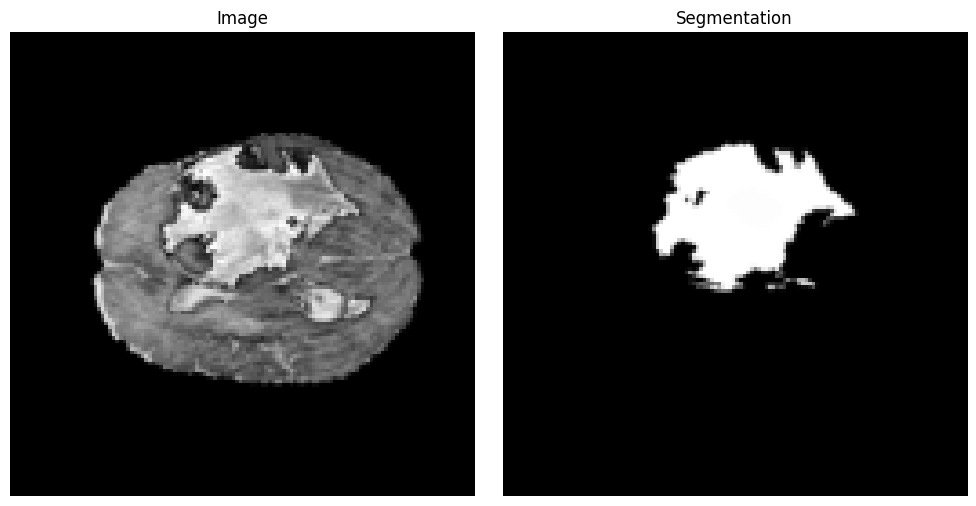

In [341]:
image, seg = train_dataset[78]

image_np = image.numpy()[0, :, :]
seg_np = seg.numpy()[0, :, :]

print("Image shape:", image_np.shape)
print("Segmentation shape:", seg_np.shape)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(image_np, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Image')

axs[1].imshow(seg_np, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Segmentation')

plt.tight_layout()
plt.show()
